# Importamos los módulos relevantes

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# Definimos fucinones que construyen y entrenan al modelo

  • build_model(my_learning_rate) -> crea un modelo vacío
  • train_model(model, feature, label, epochs) -> entrena el modelo con los ejemplos (con atributos y etiqueta) que le pasemos.

In [11]:
#@title Definir las funciones que construyen y entrenan el modelo
def build_model(my_learning_rate):
  """Crear y compilar una simple regresión lineal."""
  # Los modelos más simples de tf.keras son secuenciales.
  # Un modelo secuaencial contiene una o más capas.
  model = tf.keras.models.Sequential()

  # Describir la topografía del modelo.
  # La topografía de una regresión lineal simple
  # es un único nodo en una sola capa.
  model.add(tf.keras.layers.Dense(units = 1,
                                  input_shape = (1,)))

  # Compilamos la topografía del modelo en un código que
  # TensorFlow puede ejecutar eficientemente. Configuramos
  # el entrenamiento para minimizar el error cuadrático medio del modelo.
  model.compile(optimizer = tf.keras.optimizers.experimental.RMSprop(learning_rate = my_learning_rate),
                loss = "mean_squared_error",
                metrics = [tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, feature, label, epochs, batch_size):
  """Entrenamos el modelo alimentándolo con datos."""

  # Introducimos los valores de las características y los valores de etiqueta
  # al modelo. El modelo será entrenado con el número especificado de "epochs",
  # aprenderá gradualmente como los valores de las características tienen
  # realción con los valores de las etiquetas.
  history = model.fit(x = feature,
                      y = label,
                      batch_size = batch_size,
                      epochs = epochs)

  # Reunir el peso y el bies del modelo entrenado.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # La lista de los epochs es guardad de manera separada del resto del historial.
  epochs = history.epoch

  # Reunir el historial (una captura) de cada epoch.
  hist = pd.DataFrame(history.history)

  # Recoger específicamente cada error cuadrático medio de cada epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("build_model y train_model definidos")

build_model y train_model definidos


# Definir funciones de ploteado

In [4]:
#@title Definir las funcionde de ploteado
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plotear el modelo entrenado en vuanto a la característica y etiqueta entrenadas"""

  # Etiquetamos/Nombramos los ejes
  plt.xlabel("feature")
  plt.ylabel("label")

  # Ploteamos los valores de la característica vs. los valores de la etiqueta
  plt.scatter(feature, label)

  # Creamos una linea roja representadon el modelo. La linea roja empieza
  # en las coordenadas (x0, y0) y termina en las coordenadas (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c = "r")

  # Renderizamos el scatter plot y la linea roja.
  plt.show()

def plot_the_loss_curve(epoch, rmse):
  """Plot the loss curve, which shows loss vs. epoch"""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epoch, rmse, label = "Loss")
  plt.legend()
  plt.ylim([rmse.min() * 0.97, rmse.max()])
  plt.show()

print("plot_the_model y plot_the_loss_curve definidos.")

plot_the_model y plot_the_loss_curve definidos.


# Definimos el dataset

El dataset consiste en 12 ejemplos. Cada ejemplo consiste en una característica y una etiqueta.

In [5]:
my_feature = ([1.0, 2.0, 3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8, 9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

# Especificiamos hyperparámetros

  • learning rate (tasa de aprendizaje)

  • epochs
  
  • batch_size (tamaño del lote)


Las siguientes lineas de código inicializan los hiperparámetros e invocan las funciones que construyen y entrenan al modelo.

Epoch 1/10
1/1 [==============================] - 0s 218ms/step - loss: 1285.1025 - root_mean_squared_error: 35.8483
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 1266.4656 - root_mean_squared_error: 35.5874
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 1253.0767 - root_mean_squared_error: 35.3988
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 1241.9438 - root_mean_squared_error: 35.2412
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 1232.1184 - root_mean_squared_error: 35.1015
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 1223.1602 - root_mean_squared_error: 34.9737
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 1214.8242 - root_mean_squared_error: 34.8543
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 1206.9581 - root_mean_squared_error: 34.7413
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 11

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


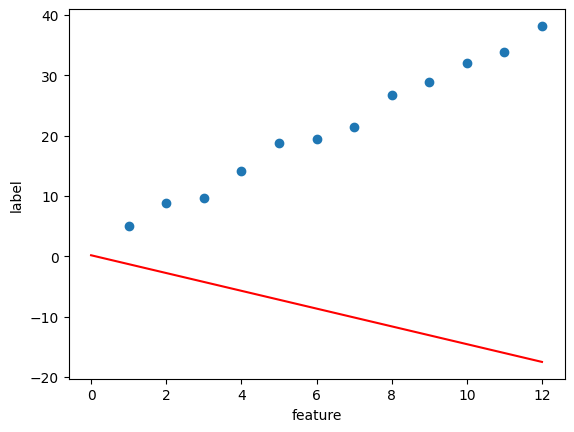

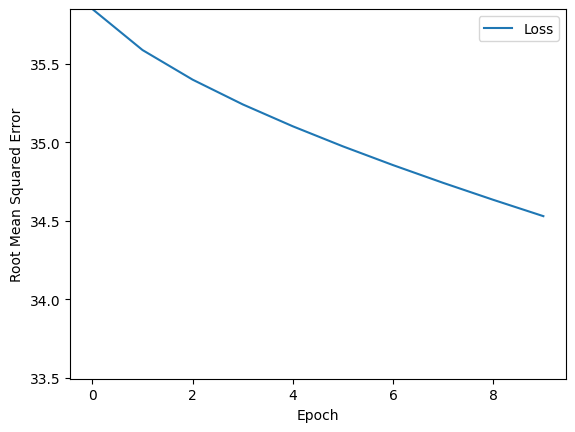

In [18]:
learning_rate = 0.01
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/90
1/1 [==============================] - 0s 220ms/step - loss: 554.7855 - root_mean_squared_error: 23.5539
Epoch 2/90
1/1 [==============================] - 0s 11ms/step - loss: 438.7178 - root_mean_squared_error: 20.9456
Epoch 3/90
1/1 [==============================] - 0s 10ms/step - loss: 367.1988 - root_mean_squared_error: 19.1624
Epoch 4/90
1/1 [==============================] - 0s 10ms/step - loss: 314.2606 - root_mean_squared_error: 17.7274
Epoch 5/90
1/1 [==============================] - 0s 10ms/step - loss: 272.0819 - root_mean_squared_error: 16.4949
Epoch 6/90
1/1 [==============================] - 0s 8ms/step - loss: 237.1218 - root_mean_squared_error: 15.3988
Epoch 7/90
1/1 [==============================] - 0s 8ms/step - loss: 207.4354 - root_mean_squared_error: 14.4026
Epoch 8/90
1/1 [==============================] - 0s 7ms/step - loss: 181.8230 - root_mean_squared_error: 13.4842
Epoch 9/90
1/1 [==============================] - 0s 10ms/step - loss: 159.4842 - 

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


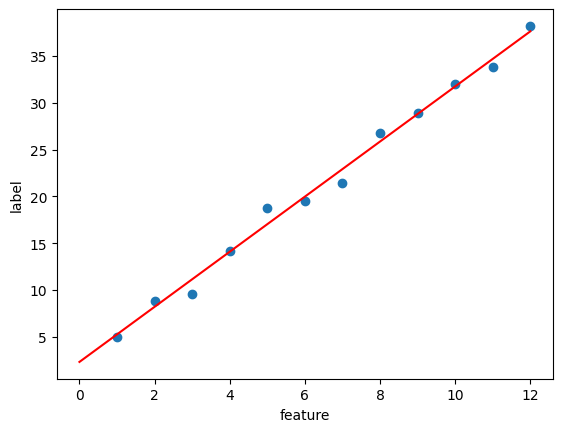

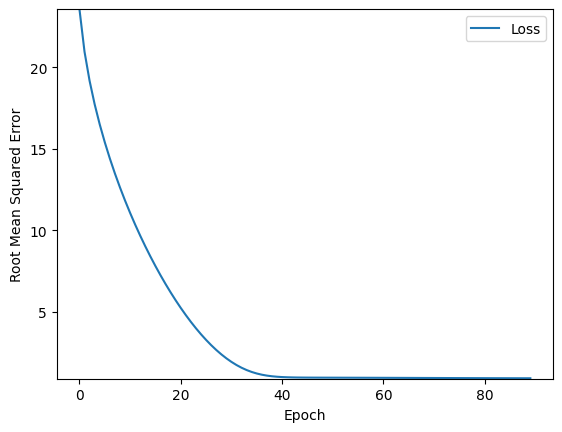

In [29]:
learning_rate = 0.1
epochs = 90
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/350
1/1 [==============================] - 1s 912ms/step - loss: 222.1460 - root_mean_squared_error: 14.9046
Epoch 2/350
1/1 [==============================] - 0s 27ms/step - loss: 214.4473 - root_mean_squared_error: 14.6440
Epoch 3/350
1/1 [==============================] - 0s 45ms/step - loss: 208.9935 - root_mean_squared_error: 14.4566
Epoch 4/350
1/1 [==============================] - 0s 10ms/step - loss: 204.5041 - root_mean_squared_error: 14.3005
Epoch 5/350
1/1 [==============================] - 0s 21ms/step - loss: 200.5752 - root_mean_squared_error: 14.1625
Epoch 6/350
1/1 [==============================] - 0s 13ms/step - loss: 197.0198 - root_mean_squared_error: 14.0364
Epoch 7/350
1/1 [==============================] - 0s 13ms/step - loss: 193.7340 - root_mean_squared_error: 13.9188
Epoch 8/350
1/1 [==============================] - 0s 25ms/step - loss: 190.6533 - root_mean_squared_error: 13.8077
Epoch 9/350
1/1 [==============================] - 0s 10ms/step - loss:

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


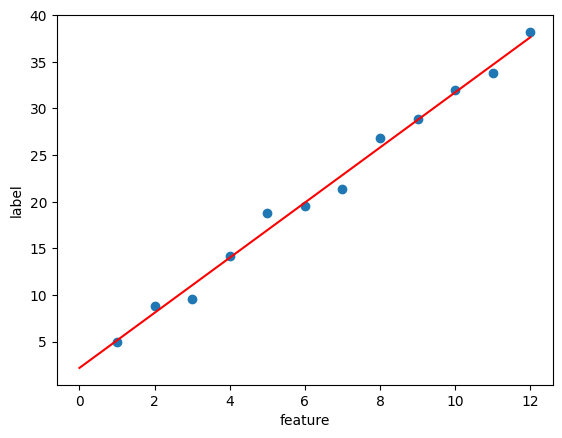

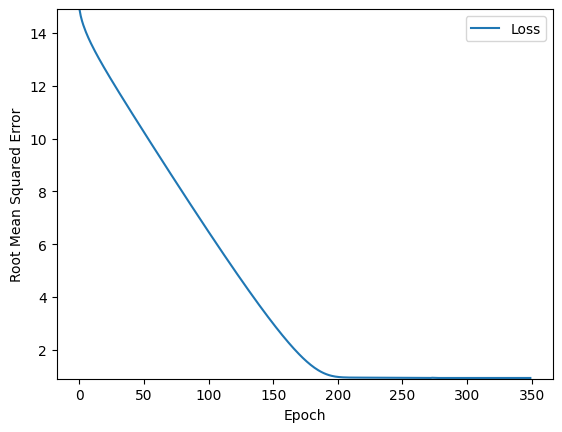

In [32]:
learning_rate = 0.01
epochs = 350
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/500
1/1 [==============================] - 0s 208ms/step - loss: 220.5783 - root_mean_squared_error: 14.8519
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 6739494.5000 - root_mean_squared_error: 2596.0537
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 219.4420 - root_mean_squared_error: 14.8136
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 1.6948 - root_mean_squared_error: 1.3018
Epoch 5/500
1/1 [==============================] - 0s 14ms/step - loss: 0.9151 - root_mean_squared_error: 0.9566
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 0.9028 - root_mean_squared_error: 0.9502
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 0.9008 - root_mean_squared_error: 0.9491
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 0.8990 - root_mean_squared_error: 0.9482
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.8973 - roo

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


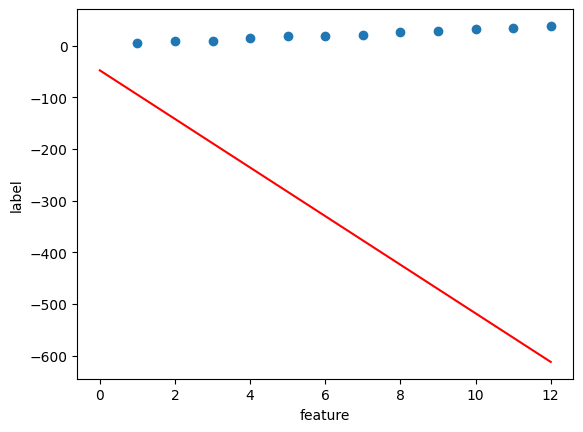

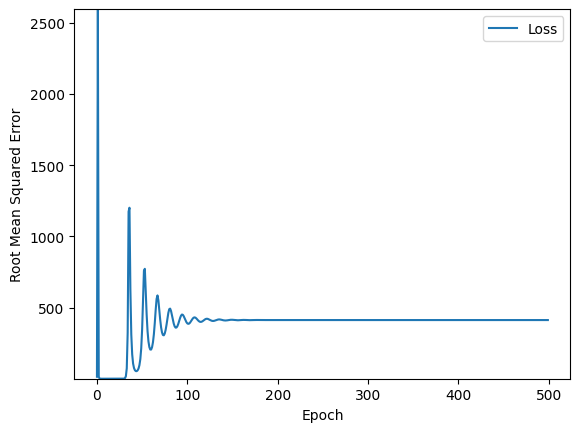

In [34]:
learning_rate = 100
epochs = 500


my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/100
1/1 [==============================] - 1s 514ms/step - loss: 1095.4354 - root_mean_squared_error: 33.0974
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 929.5530 - root_mean_squared_error: 30.4886
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 822.0582 - root_mean_squared_error: 28.6716
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 739.2792 - root_mean_squared_error: 27.1897
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 670.9077 - root_mean_squared_error: 25.9019
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 612.2440 - root_mean_squared_error: 24.7436
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 560.6987 - root_mean_squared_error: 23.6791
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 514.6735 - root_mean_squared_error: 22.6864
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 473.

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


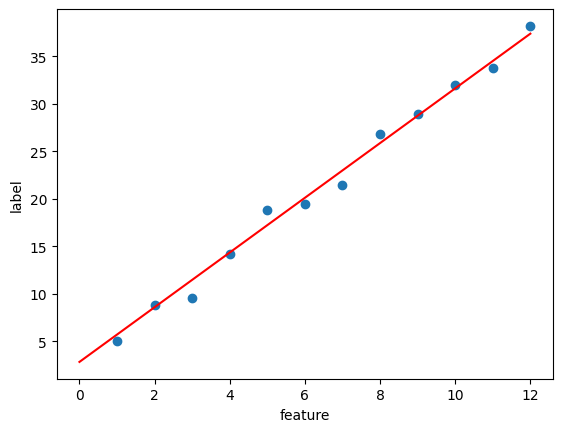

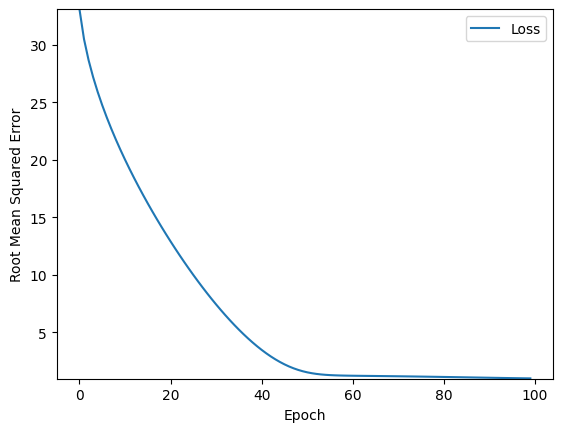

In [36]:
# Set the learning rate and number of epochs
learning_rate= 0.1
epochs= 100   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/70
1/1 [==============================] - 0s 378ms/step - loss: 456.9938 - root_mean_squared_error: 21.3774
Epoch 2/70
1/1 [==============================] - 0s 16ms/step - loss: 314.2320 - root_mean_squared_error: 17.7266
Epoch 3/70
1/1 [==============================] - 0s 29ms/step - loss: 234.8773 - root_mean_squared_error: 15.3257
Epoch 4/70
1/1 [==============================] - 0s 17ms/step - loss: 180.9260 - root_mean_squared_error: 13.4509
Epoch 5/70
1/1 [==============================] - 0s 28ms/step - loss: 141.2829 - root_mean_squared_error: 11.8862
Epoch 6/70
1/1 [==============================] - 0s 11ms/step - loss: 110.9843 - root_mean_squared_error: 10.5349
Epoch 7/70
1/1 [==============================] - 0s 11ms/step - loss: 87.3138 - root_mean_squared_error: 9.3442
Epoch 8/70
1/1 [==============================] - 0s 11ms/step - loss: 68.5929 - root_mean_squared_error: 8.2821
Epoch 9/70
1/1 [==============================] - 0s 9ms/step - loss: 53.6950 - roo

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


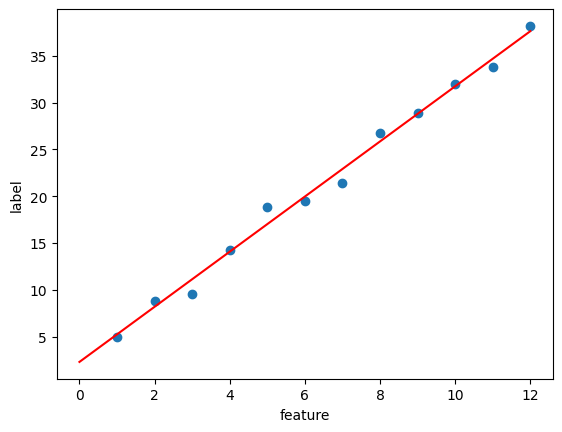

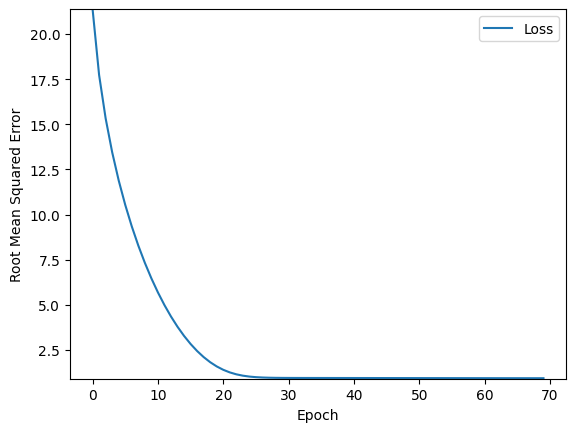

In [37]:
# Set the learning rate and number of epochs
learning_rate= 0.14
epochs= 70   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/100
12/12 [==============================] - 0s 1ms/step - loss: 813.7253 - root_mean_squared_error: 28.5259
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 579.1469 - root_mean_squared_error: 24.0655
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 414.6359 - root_mean_squared_error: 20.3626
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 282.6986 - root_mean_squared_error: 16.8136
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 187.5846 - root_mean_squared_error: 13.6962
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 115.5852 - root_mean_squared_error: 10.7511
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 59.7768 - root_mean_squared_error: 7.7315
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 26.5870 - root_mean_squared_error: 5.1563
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - l

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


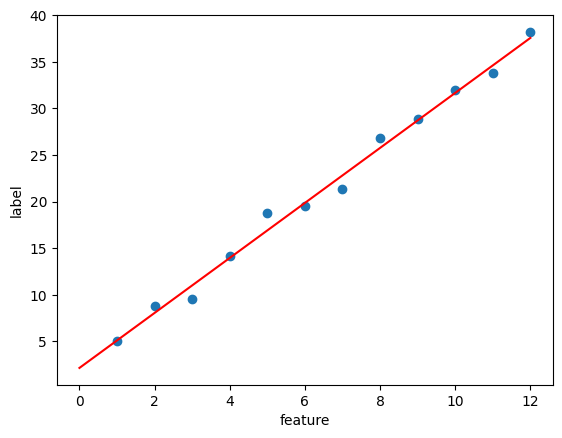

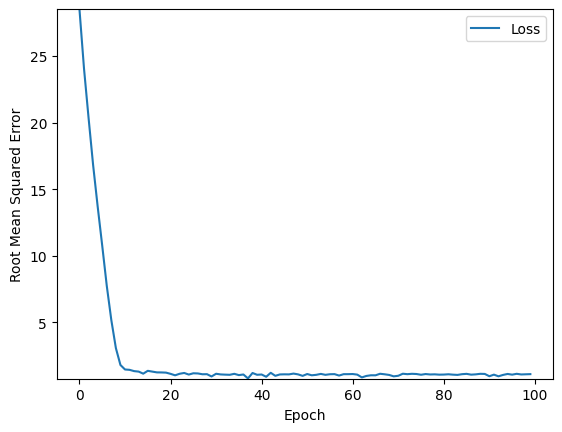

In [41]:
learning_rate=0.05
epochs=100
my_batch_size= 1  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Resumen del afinado de hipeparámetros

  • La pérdida de entrenamiento debe disminuir de manera constante, abruptamente al principio y luego más lentamente hasta que la pendiente de la curva alcance o se acerque a cero.

  • Si la pérdida de entrenamiento no converge, entrenar por más épocas.

  • Si la pérdida de entrenamiento disminuye demasiado lentamente, aumente la tasa de aprendizaje. Tenga en cuenta que establecer una tasa de aprendizaje demasiado alta también puede evitar que la pérdida de entrenamiento converja.

  • Si la pérdida de entrenamiento varía mucho (es decir, la pérdida de entrenamiento salta), reduzca la tasa de aprendizaje.

  • Reducir la tasa de aprendizaje mientras se aumenta el número de épocas o el tamaño del lote suele ser una buena combinación.

  • Establecer el tamaño del lote en un número de lote muy pequeño también puede causar inestabilidad. Primero, pruebe con valores de tamaño de lote grandes. Luego, disminuya el tamaño del lote hasta que vea degradación.

  • Para conjuntos de datos del mundo real que consisten en una gran cantidad de ejemplos, es posible que el conjunto de datos completo no quepa en la memoria. En tales casos, deberá reducir el tamaño del lote para permitir que un lote quepa en la memoria.